In [23]:
import pandas as pd

In [24]:
dados = pd.read_csv('Mercado_imobiliario.csv', sep=';', encoding='UTF-8')

dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


In [25]:
dados.shape

(5000, 4)

#### Analises descritivas

In [26]:
dados.describe()

,Valor,Area,Dist_Praia,Dist_Farmacia
count,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,1.402926e+06,121.944800,3.021920,0.497160
std,1.883269e+06,90.536969,3.170933,0.291355
min,7.500000e+04,16.000000,0.000000,0.000331
25%,4.600000e+05,70.000000,0.438417,0.238640
50%,8.200000e+05,93.000000,1.476958,0.503260
75%,1.590000e+06,146.000000,5.605379,0.747737
max,2.500000e+07,2000.000000,17.962942,0.999987


In [27]:
dados.corr().round(4)

,Valor,Area,Dist_Praia,Dist_Farmacia
Valor,1.0000,0.7110,-0.3665,-0.0244
Area,0.7110,1.0000,-0.2834,-0.0310
Dist_Praia,-0.3665,-0.2834,1.0000,0.0256
Dist_Farmacia,-0.0244,-0.0310,0.0256,1.0000


In [28]:
import seaborn as sns

In [29]:
sns.set_palette('Accent')
sns.set_style('whitegrid')

#### Box plot da variável *dependente*

<Axes: title={'center': 'Preço dos Imóveis'}, xlabel='Reais'>

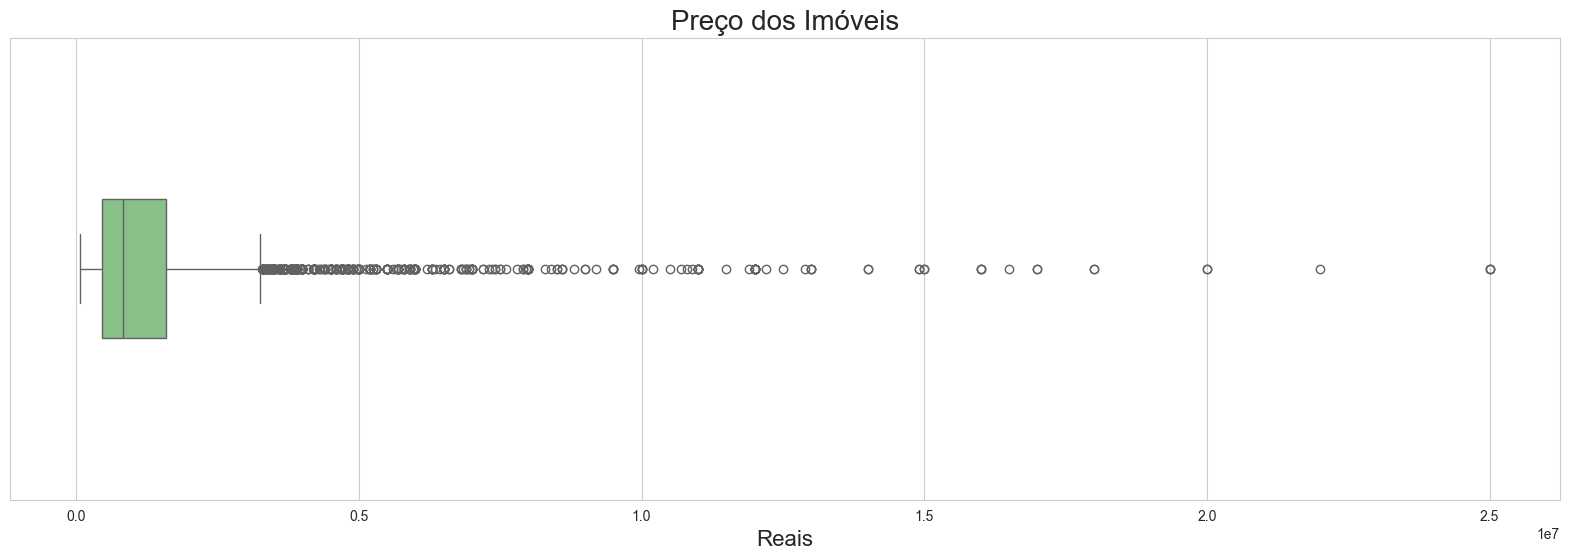

In [30]:
ax = sns.boxplot(data=dados['Valor'], orient='h', width=0.3)
ax.figure.set_size_inches(20, 6)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_xlabel('Reais', fontsize=16)
ax

#### Distribuição de frequências da variável dependente (y)

C:\Users\loany\AppData\Local\Temp\ipykernel_20788\2921554394.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['Valor'], kde=True)


<Axes: title={'center': 'Distribuição de Frequências'}, xlabel='Preço dos Imóveis (R$)', ylabel='Density'>

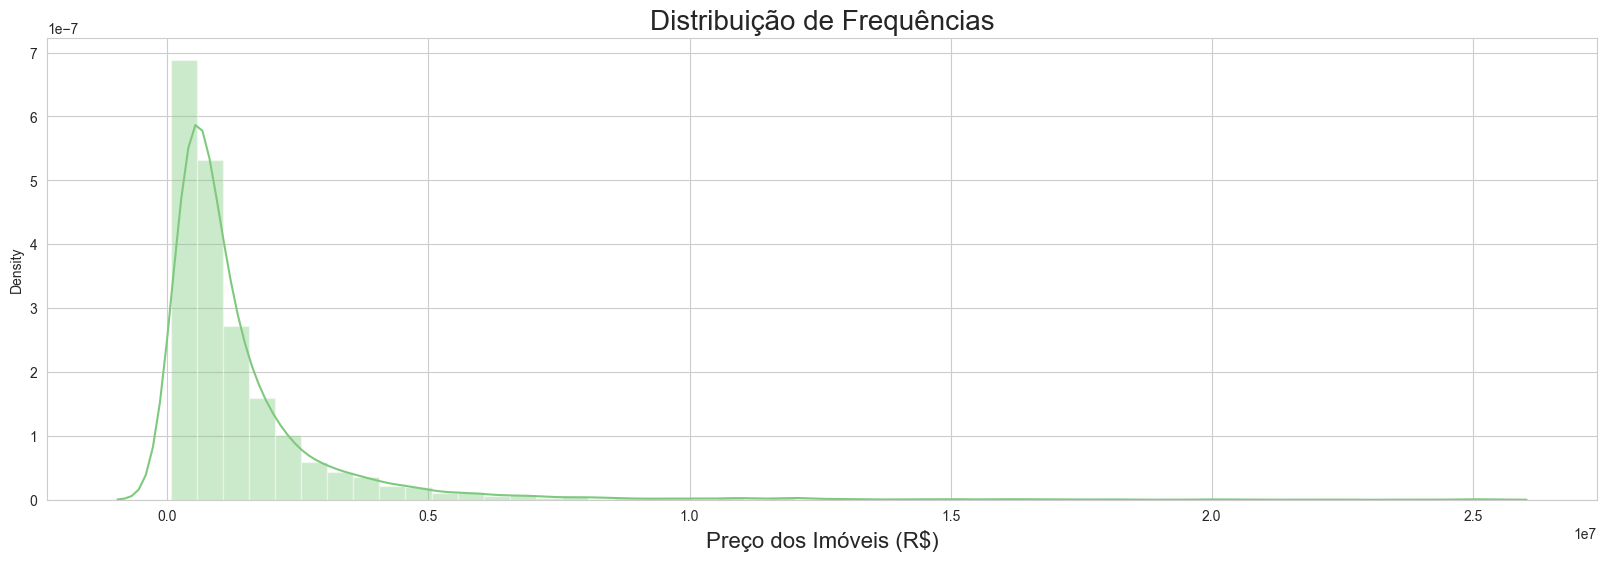

In [31]:
ax = sns.distplot(dados['Valor'], kde=True)
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Preço dos Imóveis (R$)', fontsize=16)
ax

#### Gráficos de dispersão

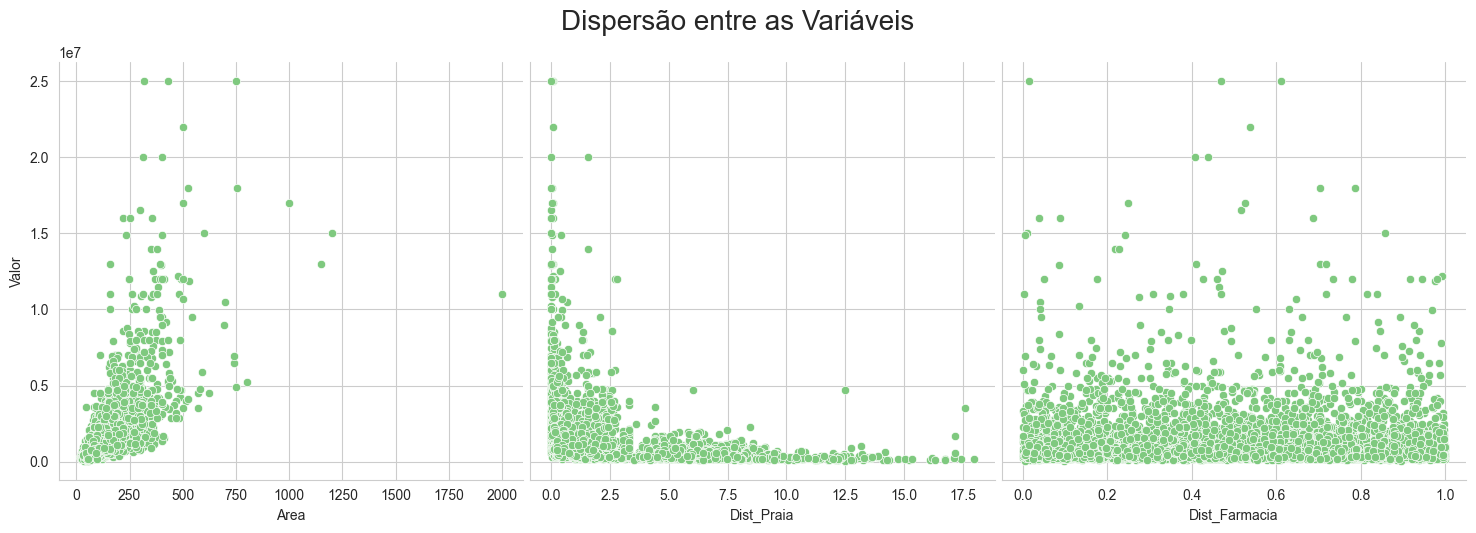

In [32]:
ax = sns.pairplot(dados, x_vars= ['Area', 'Dist_Praia', 'Dist_Farmacia'], y_vars='Valor', height=5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

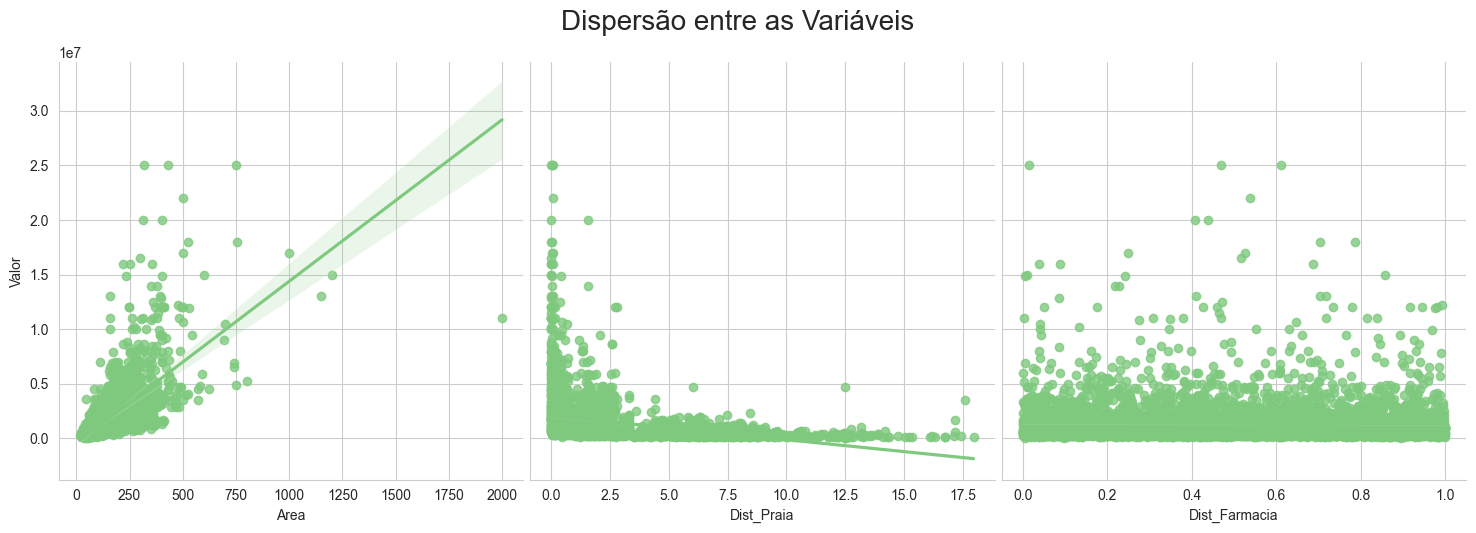

In [33]:
ax = sns.pairplot(dados, x_vars= ['Area', 'Dist_Praia', 'Dist_Farmacia'], y_vars='Valor', height=5, kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

#### Distribuição Normal

In [34]:
import numpy as np

In [35]:
dados['log_Valor']=np.log(dados['Valor'])
dados['log_Area']=np.log(dados['Area'])
dados['log_Dist_Praia']=np.log(dados['Dist_Praia']+1)
dados['log_Dist_Farmacia']=np.log(dados['Dist_Farmacia']+1)

In [36]:
dados.head(5)

,Valor,Area,Dist_Praia,Dist_Farmacia,log_Valor,log_Area,log_Dist_Praia,log_Dist_Farmacia
0,4600000,280,0.240925,0.793637,15.341567,5.634790,0.215857,0.584245
1,900000,208,0.904136,0.134494,13.710150,5.337538,0.644028,0.126187
2,2550000,170,0.059525,0.423318,14.751604,5.135798,0.057821,0.352991
3,550000,100,2.883181,0.525064,13.217674,4.605170,1.356655,0.422036
4,2200000,164,0.239758,0.192374,14.603968,5.099866,0.214916,0.175946


C:\Users\loany\AppData\Local\Temp\ipykernel_20788\2995635524.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['log_Valor'])


<Axes: title={'center': 'Distribuição de Frequências'}, xlabel='log do Preço dos Imóveis', ylabel='Density'>

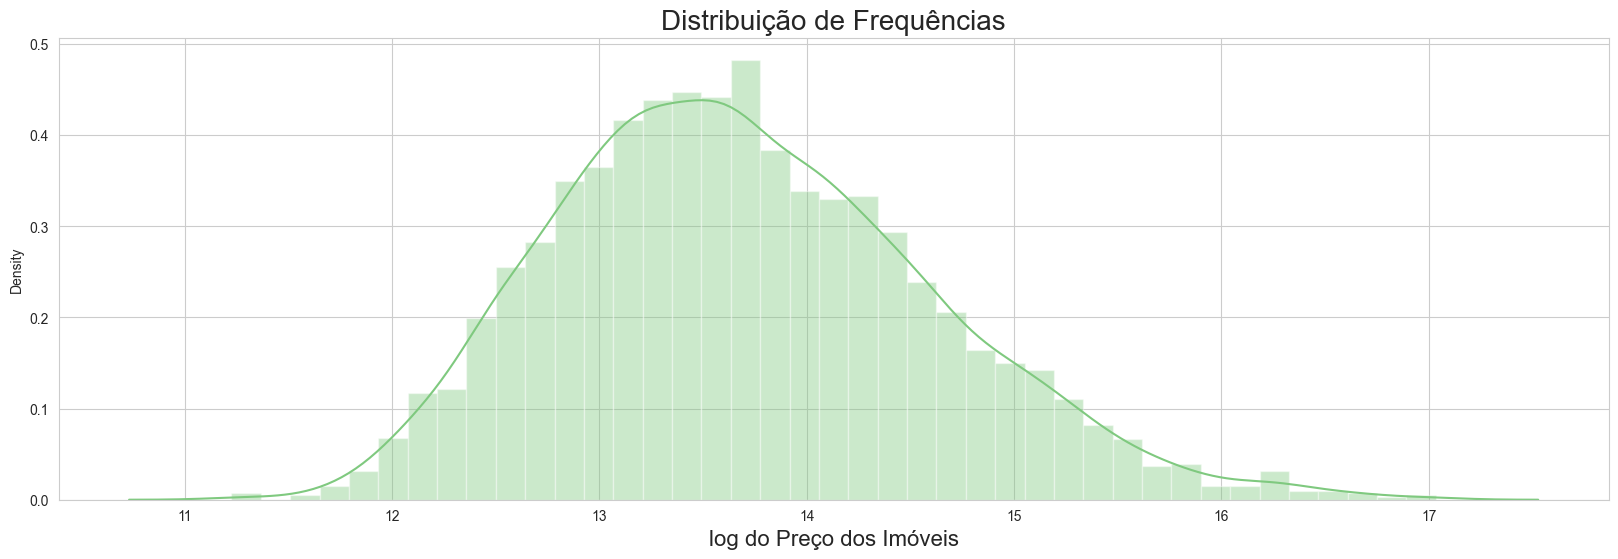

In [37]:
ax = sns.distplot(dados['log_Valor'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('log do Preço dos Imóveis', fontsize=16)
ax

### Verificando Relação Linear

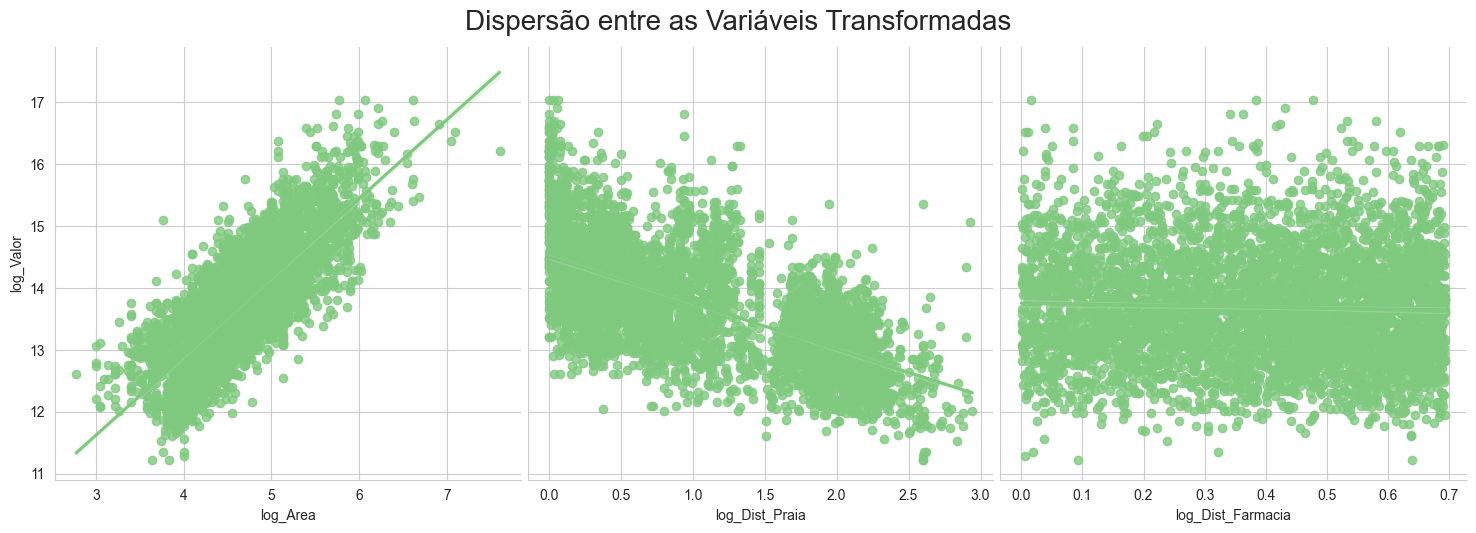

In [38]:
ax = sns.pairplot(dados, x_vars=['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia'], y_vars='log_Valor', height=5, kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis Transformadas', fontsize=20, y=1.05)
ax

### Criando os *Datasets* de Treino e Teste

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
y = dados['log_Valor']

In [41]:
X = dados[['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia']]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)

In [43]:
import statsmodels.api as sm

In [44]:
X_train_com_constante = sm.add_constant(X_train)
X_train_com_constante

,const,log_Area,log_Dist_Praia,log_Dist_Farmacia
2661,1.0,5.945421,0.000000,0.382273
912,1.0,3.135494,0.972865,0.605015
3042,1.0,4.317488,1.794961,0.486594
141,1.0,3.401197,0.310455,0.599609
3854,1.0,5.676754,0.032193,0.101903
...,...,...,...,...
3657,1.0,5.075174,2.023480,0.333605
979,1.0,4.174387,2.296141,0.156465
2389,1.0,4.394449,1.367741,0.409727
447,1.0,3.951244,2.166841,0.217381


In [45]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst=True).fit()

#### Avaliando as estatísticas de teste do modelo

In [46]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     5495.
Date:                Tue, 23 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:13:47   Log-Likelihood:                -2044.9
No. Observations:                4000   AIC:                             4098.
Df Residuals:                    3996   BIC:                             4123.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.3417      0.06

#### Criando um novo conjunto de variáveis explicativas (X)

In [47]:
X = dados[['log_Area','log_Dist_Praia']]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)

In [49]:
X_train_com_constante = sm.add_constant(X_train)
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst=True).fit()

In [50]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     8244.
Date:                Tue, 23 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:13:47   Log-Likelihood:                -2045.1
No. Observations:                4000   AIC:                             4096.
Df Residuals:                    3997   BIC:                             4115.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.3349      0.059    158.

#### Estimando o Modelo com os Dados de Treino

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [52]:
modelo = LinearRegression()

In [53]:
modelo.fit(X_train, y_train)

LinearRegression()

In [54]:
print ('R quadrado = {}'.format(modelo.score(X_train, y_train).round(3)))

R quadrado = 0.805


In [55]:
y_previsto = modelo.predict(X_test)

In [56]:
print ('R quadrado previsto = %s' %(metrics.r2_score(y_test, y_previsto).round(3)))

R quadrado previsto = 0.79


#### Previsões Pontuais

In [57]:
entrada = X_test[0:1]
entrada

,log_Area,log_Dist_Praia
1006,5.273,1.282769


In [58]:
modelo.predict(entrada)[0]

14.28482006184788

In [59]:
np.exp(modelo.predict(entrada)[0]).round(2)

1598889.78

### Criando um simulador simples

In [60]:
Area = 250
Dist_Praia = 1
entrada = [[np.log(Area),np.log(Dist_Praia+1)]]
valor = np.exp(modelo.predict(entrada)[0]).round(2)
print (f'Valor estimado do imovel será R$ {valor}')

Valor estimado do imovel será R$ 2777292.84


C:\Users\loany\PycharmProjects\pythonProject3\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### Interpretação dos Coeficientes Estimados

In [61]:
modelo.intercept_

9.334916409800318

In [62]:
np.exp(modelo.intercept_)

11326.68142806972

In [63]:
coeficientes = modelo.coef_

In [64]:
X.columns

Index(['log_Area', 'log_Dist_Praia'], dtype='object')

In [65]:
index = ['Intercepto', 'log_Area', 'log_Dist_Praia']

In [66]:
pd.DataFrame(data=np.append(modelo.intercept_,modelo.coef_), index=index, columns=['Parametro'])

,Parametro
Intercepto,9.334916
log_Area,1.058078
log_Dist_Praia,-0.490612


### Análises Gráficas dos Resultados do Modelo

In [67]:
y_previsto_train = modelo.predict(X_train)

<Axes: title={'center': 'Previsão X Real'}, xlabel='log do Preço - Previsão', ylabel='log do Preço - Real'>

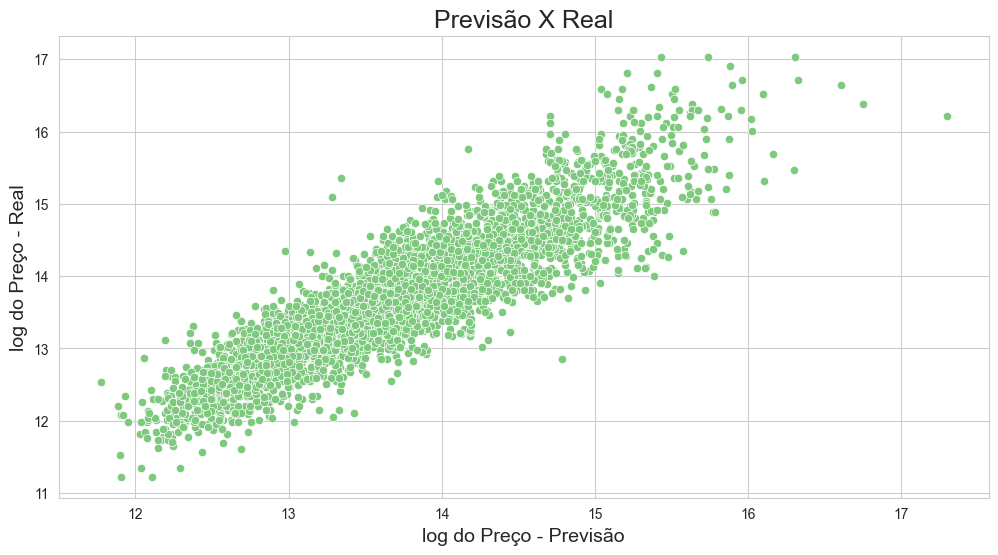

In [68]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('log do Preço - Previsão', fontsize=14)
ax.set_ylabel('log do Preço - Real', fontsize=14)
ax

In [69]:
residuo = y_train - y_previsto_train

<Axes: title={'center': 'Distribuição de Frequências dos Resíduos'}, xlabel='log do Preço', ylabel='log_Valor'>

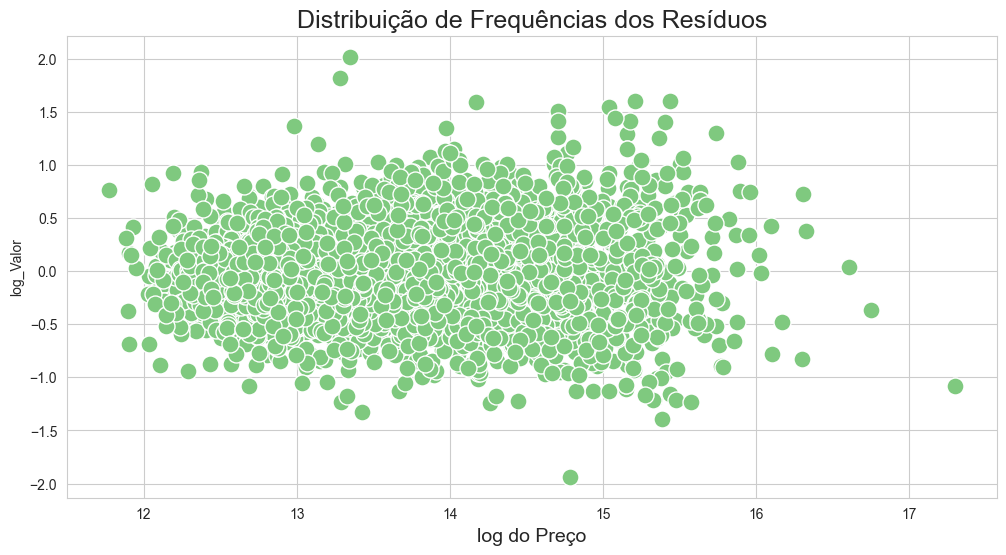

In [70]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo, s=150)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('log do Preço', fontsize=14)
ax